In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
def plot_results(distances, predictions):
    layer_names = sorted(
        [k for k in distances.keys() if k.startswith("layer_")],
        key=lambda x: int(x.split('_')[1])
    )

    try:
        similarity_values = [float(distances[layer]) for layer in layer_names]
        prob_values = [float(predictions.get(f"{layer}_prob", np.nan)) for layer in layer_names]
        predicted_labels = [predictions.get(f"{layer}_label", "") for layer in layer_names]
    except Exception as e:
        print("Error preparing data:", e)
        return

    if not all(isinstance(v, (int, float)) for v in similarity_values + prob_values):
        print("Some values are not numeric.")
        return

    fig, axes = plt.subplots(2, 1, figsize=(12, 6), gridspec_kw={'height_ratios': [1, 1]})

    sns.heatmap(np.array(similarity_values).reshape(1, -1), annot=True, cmap="viridis",
                xticklabels=layer_names, yticklabels=["Cosine Similarity"], cbar=True,
                ax=axes[0], cbar_kws={'label': 'Cosine Similarity'})

    sns.heatmap(np.array(prob_values).reshape(1, -1), annot=True, cmap="magma",
                xticklabels=layer_names, yticklabels=["Prediction Prob."], cbar=True,
                ax=axes[1], cbar_kws={'label': 'Prediction Probability'})

    for i, label in enumerate(predicted_labels):
        if label is not None and label != "":
            axes[1].text(i + 0.5, -0.05, str(label), ha='center', va='bottom',
                         color='black', fontsize=9, rotation=90,
                         transform=axes[1].transData)


    plt.suptitle("Cosine Similarity & Prediction Probability per Layer", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.93]) 
    plt.show()



def plot_cosine_similarity_distribution(df):
    df_layers = df.drop(columns=['Image'])
    df_layers = df_layers.iloc[:, :-1]

    df_melted = df_layers.melt(var_name='Layer', value_name='CosineSimilarity')

    plt.figure(figsize=(14,6))
    sns.boxplot(data = df_melted, x='Layer', y='CosineSimilarity')

    plt.title('Cosine Similarity Distribution per Layer')
    plt.xticks(rotation=45)
    plt.ylabel('Cosine Similarity')
    plt.xlabel('Layer')
    plt.tight_layout()
    plt.show()



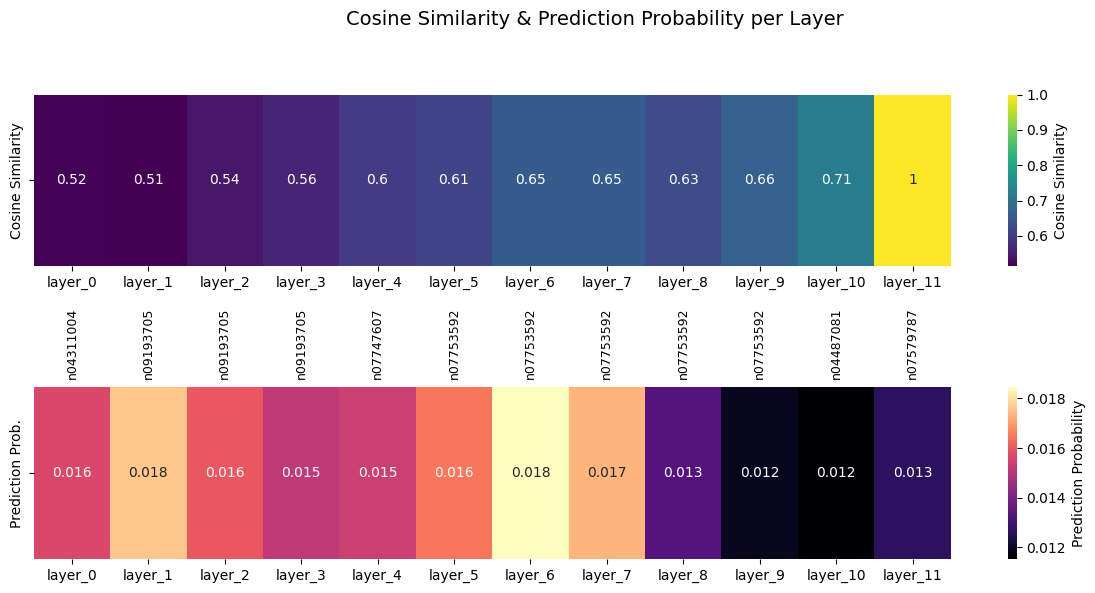

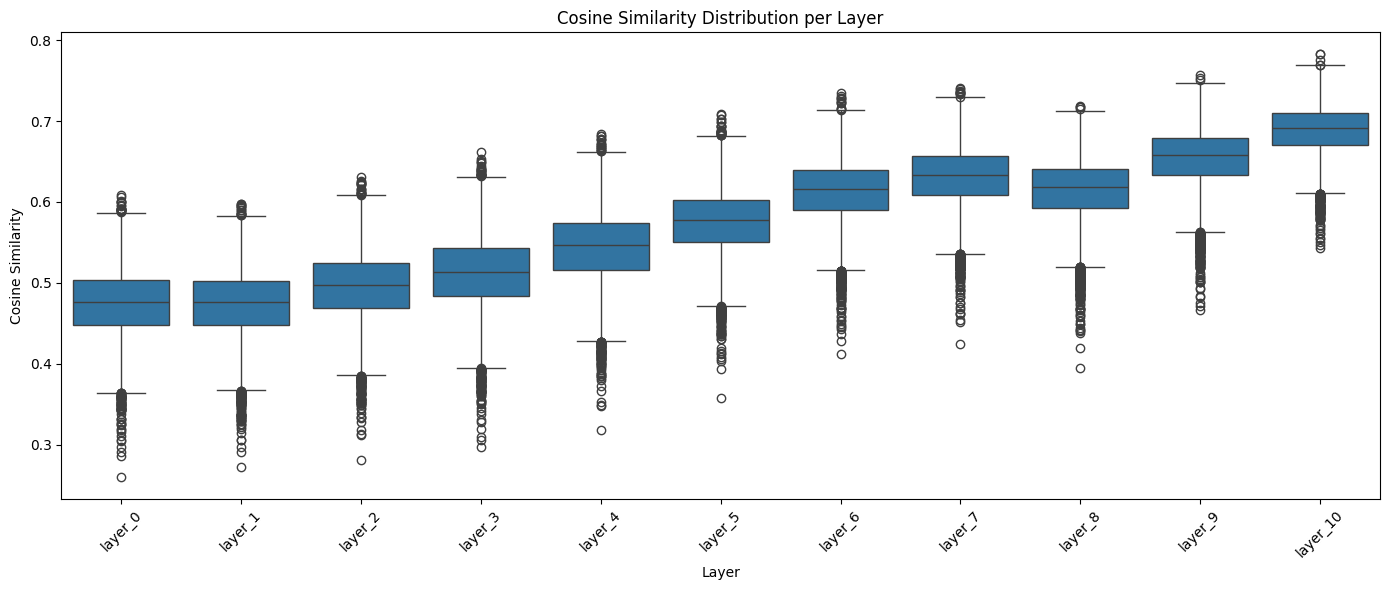

In [22]:
distances = pd.read_csv("logit_lens_results/CLIP/cosine_similarity.csv")
predictions = pd.read_csv("logit_lens_results/CLIP/predictions.csv")

plot_results(distances.iloc[9, 1:].to_dict(), predictions.iloc[9, 1:].to_dict())
plot_cosine_similarity_distribution(distances)